Shubham Jaysukhbhai Kothiya

### A3: Analysis of NASA - Whistler Waves


In [1]:
import librosa
import numpy as np
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

audio_data = "./3NSWhistler_Waves.mp3"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)
librosa.load(audio_data, sr=44100)

<class 'numpy.ndarray'> <class 'int'>
(680996,) 22050


(array([0.0000000e+00, 1.5085531e-10, 3.9470605e-10, ..., 7.5010937e-03,
        1.6088143e-02, 1.5781028e-02], dtype=float32),
 44100)

In [2]:
import IPython.display as ipd
ipd.Audio(audio_data)

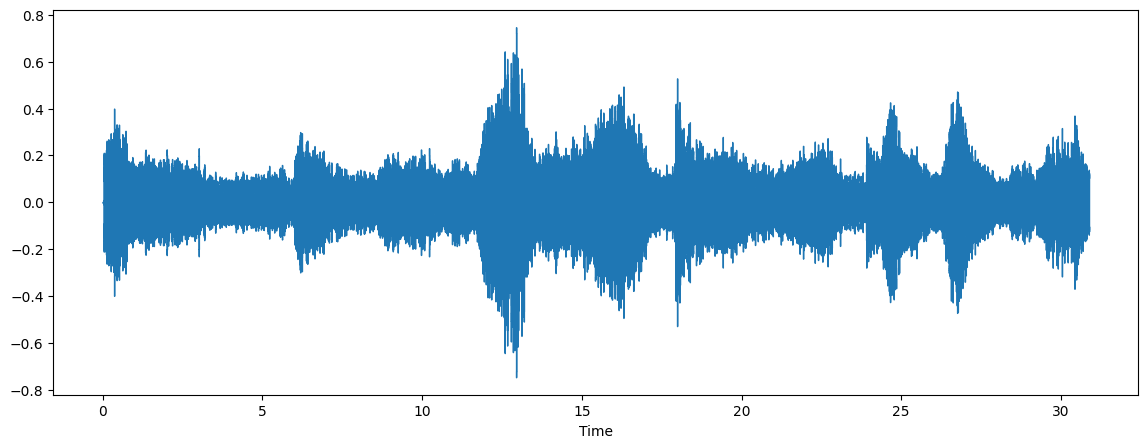

In [3]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [4]:
# Build a simple chroma filter bank
chromafb = librosa.filters.chroma(sr=22050, n_fft=4096)
# Use quarter-tones instead of semitones
librosa.filters.chroma(sr=22050, n_fft=4096, n_chroma=24)
# Equally weight all octaves
librosa.filters.chroma(sr=22050, n_fft=4096, octwidth=None)

array([[3.06632757e-01, 2.43654341e-01, 1.60742402e-01, ...,
        2.75466492e-20, 2.33491276e-20, 1.97881458e-20],
       [3.00136745e-01, 2.74304509e-01, 2.27255851e-01, ...,
        6.61833761e-13, 5.80291837e-13, 5.08708906e-13],
       [2.90173739e-01, 3.00350249e-01, 2.96240419e-01, ...,
        2.91240070e-07, 2.64146166e-07, 2.39527623e-07],
       ...,
       [3.03631455e-01, 2.60380656e-01, 1.95162937e-01, ...,
        2.12708409e-16, 2.44482217e-16, 2.80916862e-16],
       [3.08412760e-01, 2.28293657e-01, 1.32887244e-01, ...,
        1.18539604e-24, 1.40935927e-24, 1.67509979e-24],
       [3.09425622e-01, 2.10499778e-01, 1.04831174e-01, ...,
        2.09995848e-29, 1.72074678e-29, 1.40981758e-29]], dtype=float32)

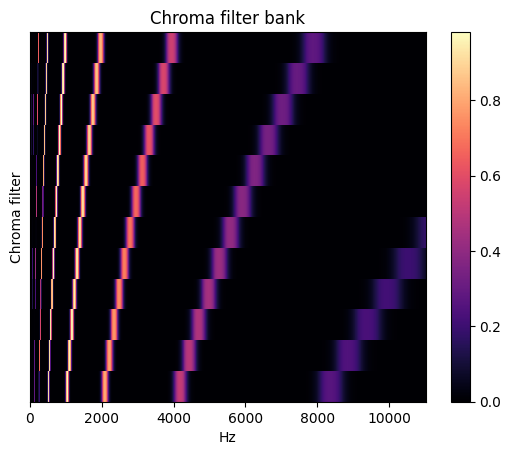

In [5]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chromafb, x_axis='linear', ax=ax)
ax.set(ylabel='Chroma filter', title='Chroma filter bank')
fig.colorbar(img, ax=ax)

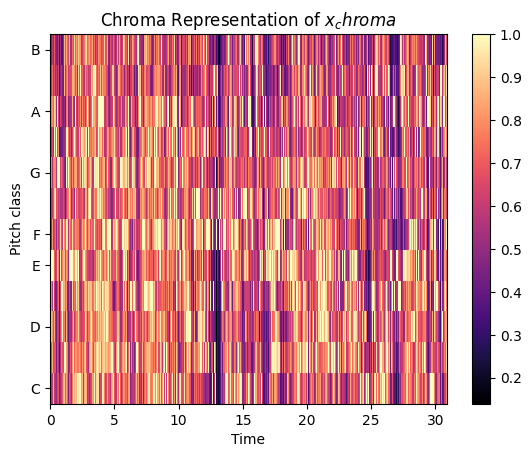

In [6]:
hop_length = 1024

x_chroma = librosa.feature.chroma_cqt(y=x, sr=sr,
                                         hop_length=hop_length)

fig, ax = plt.subplots(nrows=1, sharey=True)
img = librosa.display.specshow(x_chroma, x_axis='time',
                               y_axis='chroma',
                               hop_length=hop_length, ax=ax)
ax.set(title='Chroma Representation of $x_chroma$')
fig.colorbar(img, ax=ax)

In [7]:
librosa.feature.chroma_stft(y=x, sr=sr)
# Use an energy (magnitude) spectrum instead of power spectrogram
S = np.abs(librosa.stft(x))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
# Use a pre-computed power spectrogram with a larger frame
S = np.abs(librosa.stft(x, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.18687738, 0.30689135, 0.32484475, ..., 0.46730247, 0.42229348,
        0.6173323 ],
       [0.47811404, 0.7134608 , 0.6108133 , ..., 0.33493036, 0.7203773 ,
        1.        ],
       [0.52241385, 0.5983249 , 0.58208764, ..., 0.5667452 , 0.82142276,
        0.7717536 ],
       ...,
       [0.45198438, 0.49545443, 0.41049334, ..., 1.        , 0.55904937,
        0.8776887 ],
       [0.25283316, 0.33199522, 0.30512598, ..., 0.79943967, 0.704011  ,
        0.84513074],
       [0.22976668, 0.25188974, 0.25865185, ..., 0.97977537, 0.6903349 ,
        0.74349743]], dtype=float32)

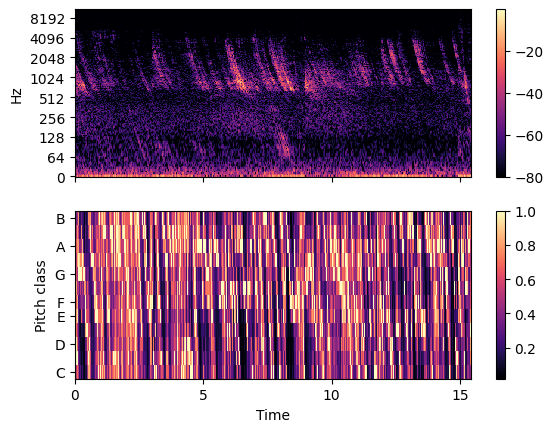

In [8]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

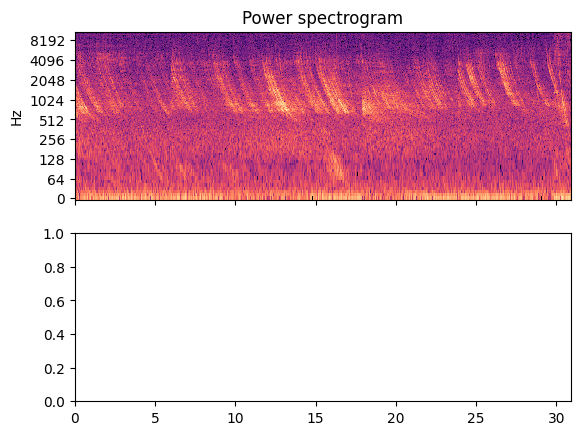

In [9]:
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

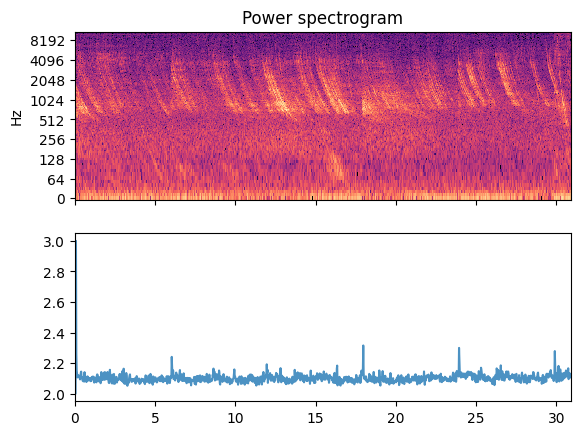

In [10]:
# Construct a standard onset function
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
onset_env = librosa.onset.onset_strength(y=x, sr=sr)
ax[1].plot(times, 2 + onset_env / onset_env.max(), alpha=0.8,
           label='Mean (mel)')

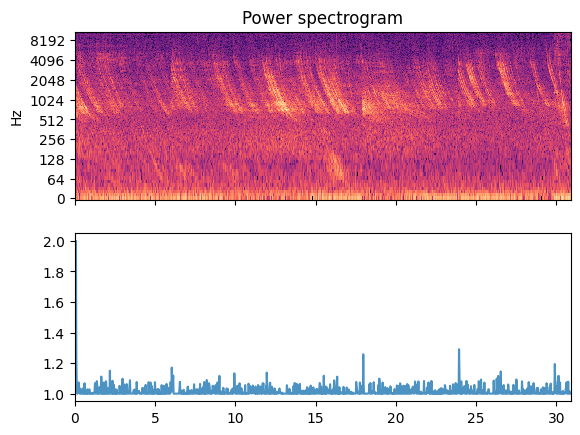

In [11]:
# Median aggregation, and custom mel options
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

onset_env = librosa.onset.onset_strength(y=x, sr=sr,
                                         aggregate=np.median,
                                         fmax=8000, n_mels=256)
ax[1].plot(times, 1 + onset_env / onset_env.max(), alpha=0.8,
           label='Median (custom mel)')

[Text(0, 0.5, 'Normalized strength'), []]

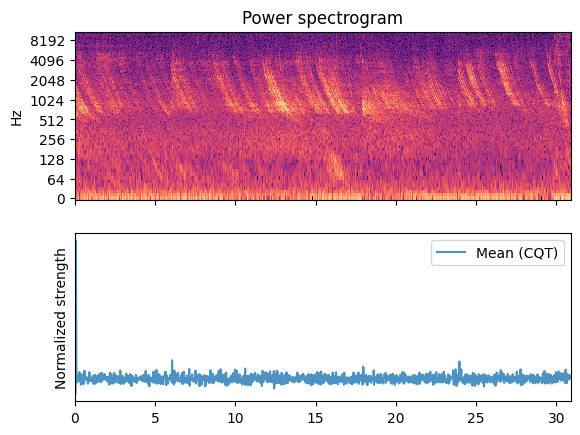

In [12]:
# Constant-Q spectrogram instead of Mel

# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()


C = np.abs(librosa.cqt(y=x, sr=sr))
onset_env = librosa.onset.onset_strength(sr=sr, S=librosa.amplitude_to_db(C, ref=np.max))
ax[1].plot(times, onset_env / onset_env.max(), alpha=0.8,
         label='Mean (CQT)')
ax[1].legend()
ax[1].set(ylabel='Normalized strength', yticks=[])

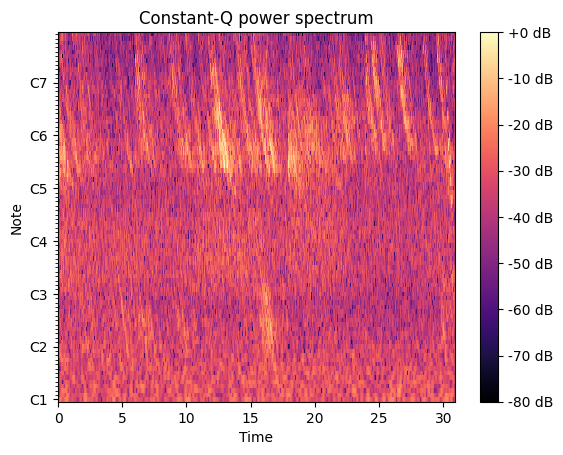

In [13]:
C = np.abs(librosa.cqt(x, sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

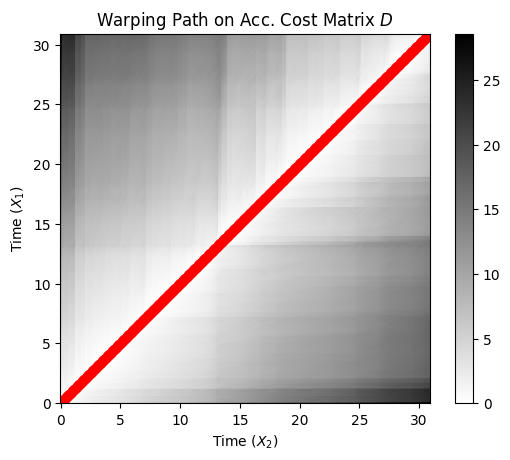

In [14]:
D, wp = librosa.sequence.dtw(X=x_chroma,Y=x_chroma, metric='cosine')
wp_s = librosa.frames_to_time(wp, sr=sr, hop_length=hop_length)

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='time', sr=sr,
                               cmap='gray_r', hop_length=hop_length, ax=ax)
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
ax.set(title='Warping Path on Acc. Cost Matrix $D$',
       xlabel='Time $(X_2)$', ylabel='Time $(X_1)$')
fig.colorbar(img, ax=ax)


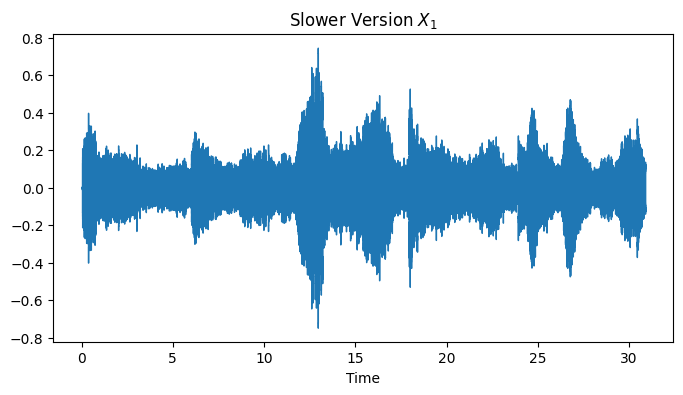

In [15]:
#Alternative Visualization in the Time Domain
fig, ax1 = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(8, 4))

# Plot x_1
librosa.display.waveshow(x, sr=sr, ax=ax1)
ax1.set(title='Slower Version $X_1$')
ax1.label_outer()


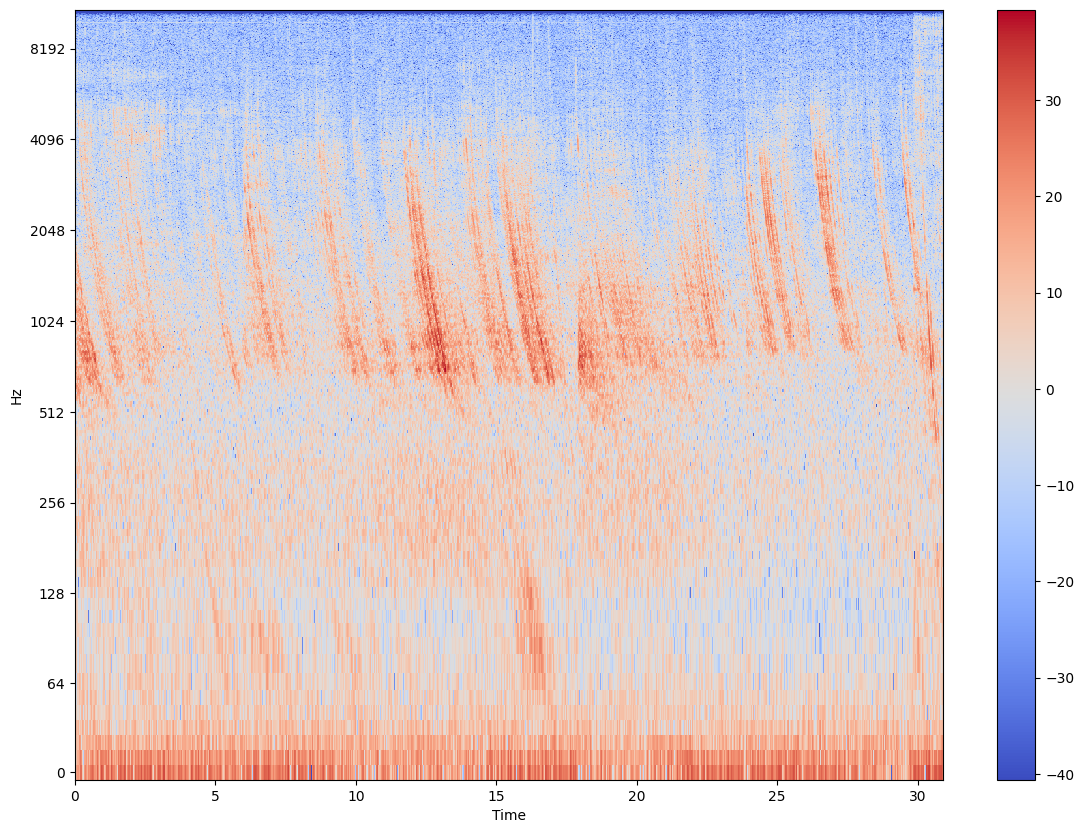

In [16]:
# Spectrogram
import matplotlib.pyplot as plt
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 10))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [17]:
X

array([[ 1.3394426e+00+0.0000000e+00j,  4.7157087e+00+0.0000000e+00j,
         6.3030782e+00+0.0000000e+00j, ...,
         3.5962654e+01+0.0000000e+00j,  3.8128712e+01+0.0000000e+00j,
         2.5476608e+01+0.0000000e+00j],
       [ 4.7086340e-01+1.2124516e+00j, -3.7538667e+00+2.0756147e+00j,
        -2.5996087e+00-5.2461332e-01j, ...,
        -1.6701126e+01-4.0779027e-01j, -2.2675919e+01+2.8868110e+00j,
        -1.4678571e+01-1.5064043e+01j],
       [-8.9931369e-01+7.8042364e-01j,  2.3803198e+00-2.9888940e+00j,
        -3.0903952e+00+1.2485433e+00j, ...,
        -1.4594613e+00+5.1786575e+00j,  3.7082005e+00-8.3226814e+00j,
         1.2828552e+00+1.1477153e+01j],
       ...,
       [ 9.0050031e-07+4.0415344e-07j, -1.9321094e-07+5.9613819e-07j,
        -1.1656336e-06-9.6828614e-08j, ...,
         1.2337783e-05-7.7252457e-07j,  4.6170875e-03+1.2192403e-03j,
        -1.0555230e-02-2.7756970e-03j],
       [ 1.6792389e-07+2.5364560e-07j,  8.2243764e-07-8.1003542e-08j,
        -1.6799038e-06

In [18]:
Xdb

array([[  2.5384822,  13.47094  ,  15.991054 , ...,  31.117035 ,
         31.625042 ,  28.122833 ],
       [  2.2833643,  12.648105 ,   8.471519 , ...,  24.457504 ,
         27.181122 ,  26.458012 ],
       [  1.5162302,  11.6433525,  10.456907 , ...,  14.616262 ,
         19.191711 ,  21.250607 ],
       ...,
       [-40.610786 , -40.610786 , -40.610786 , ..., -40.610786 ,
        -40.610786 , -39.24025  ],
       [-40.610786 , -40.610786 , -40.610786 , ..., -40.610786 ,
        -40.610786 , -39.25409  ],
       [-40.610786 , -40.610786 , -40.610786 , ..., -40.610786 ,
        -40.610786 , -39.2508   ]], dtype=float32)

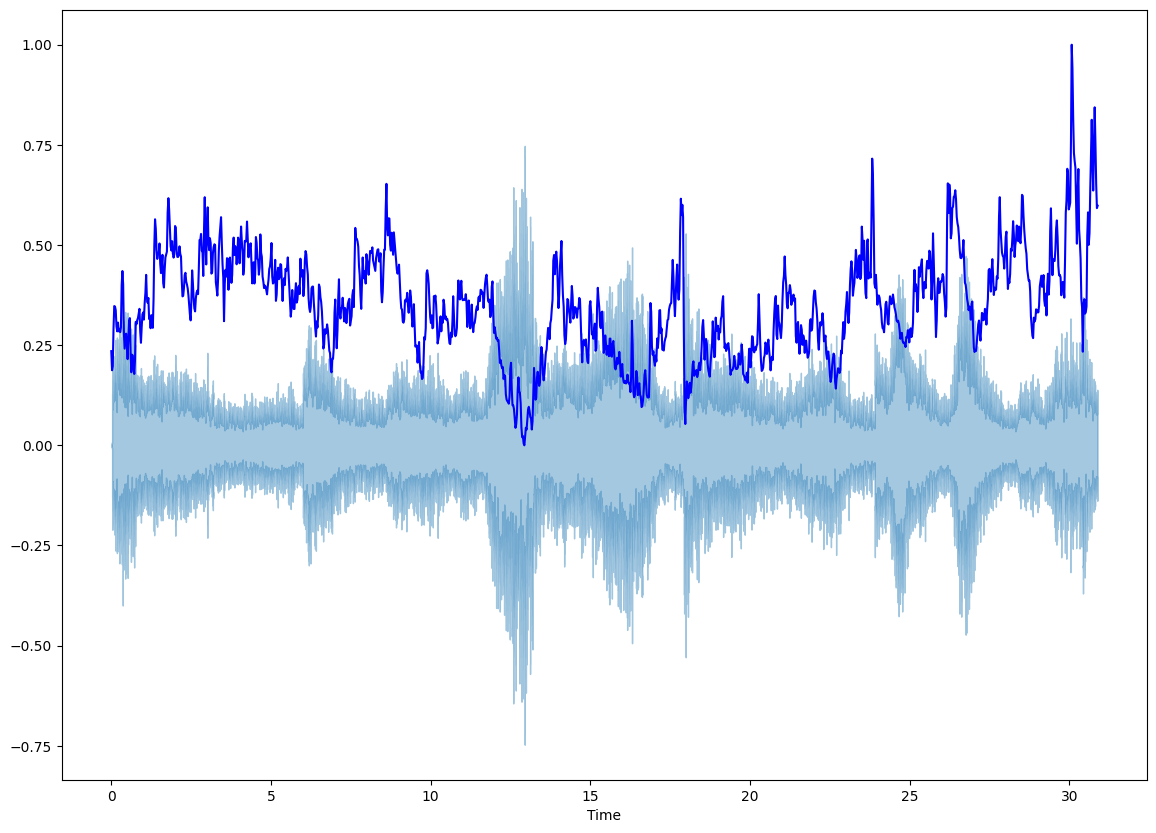

In [19]:
# Spectral Centroid
import sklearn
from sklearn import preprocessing
#https://zhuanlan.zhihu.com/p/144922679
#labelEncoder= preprocessing.LabelEncoder()

spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape
plt.figure(figsize=(14, 10))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

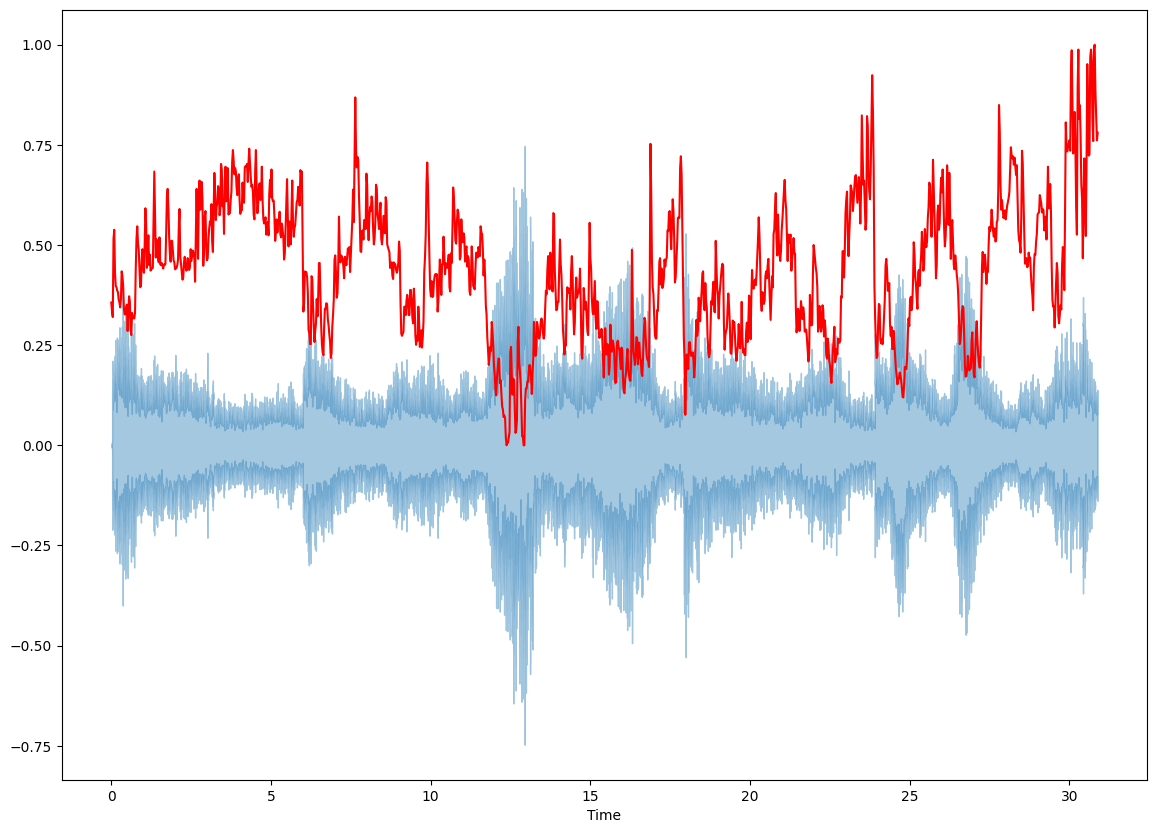

In [20]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(14, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

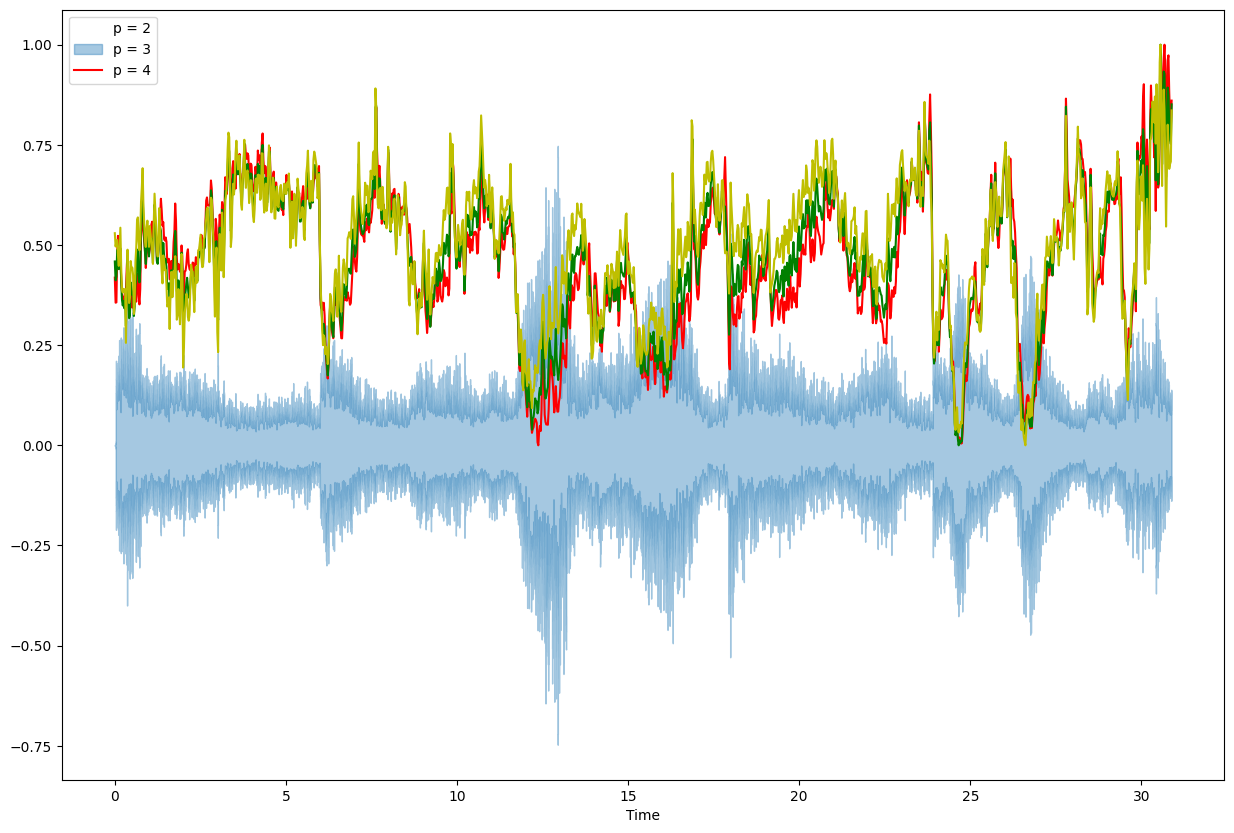

In [21]:
# Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

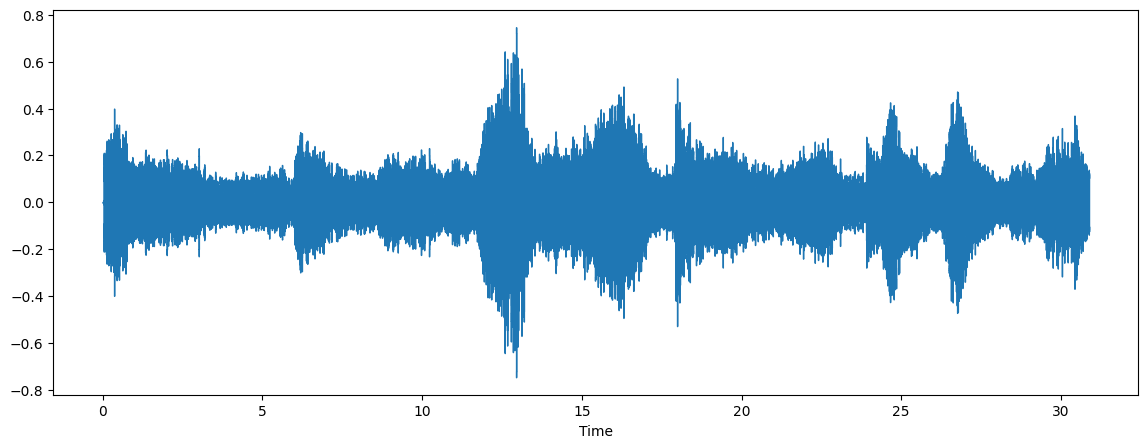

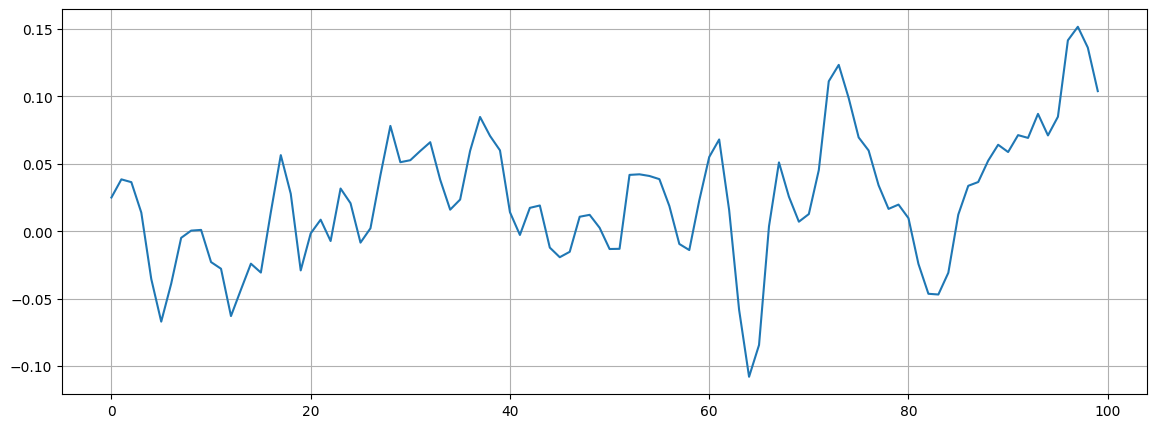

In [22]:
# Zero-Crossing Rate
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [23]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

22


(20, 1331)


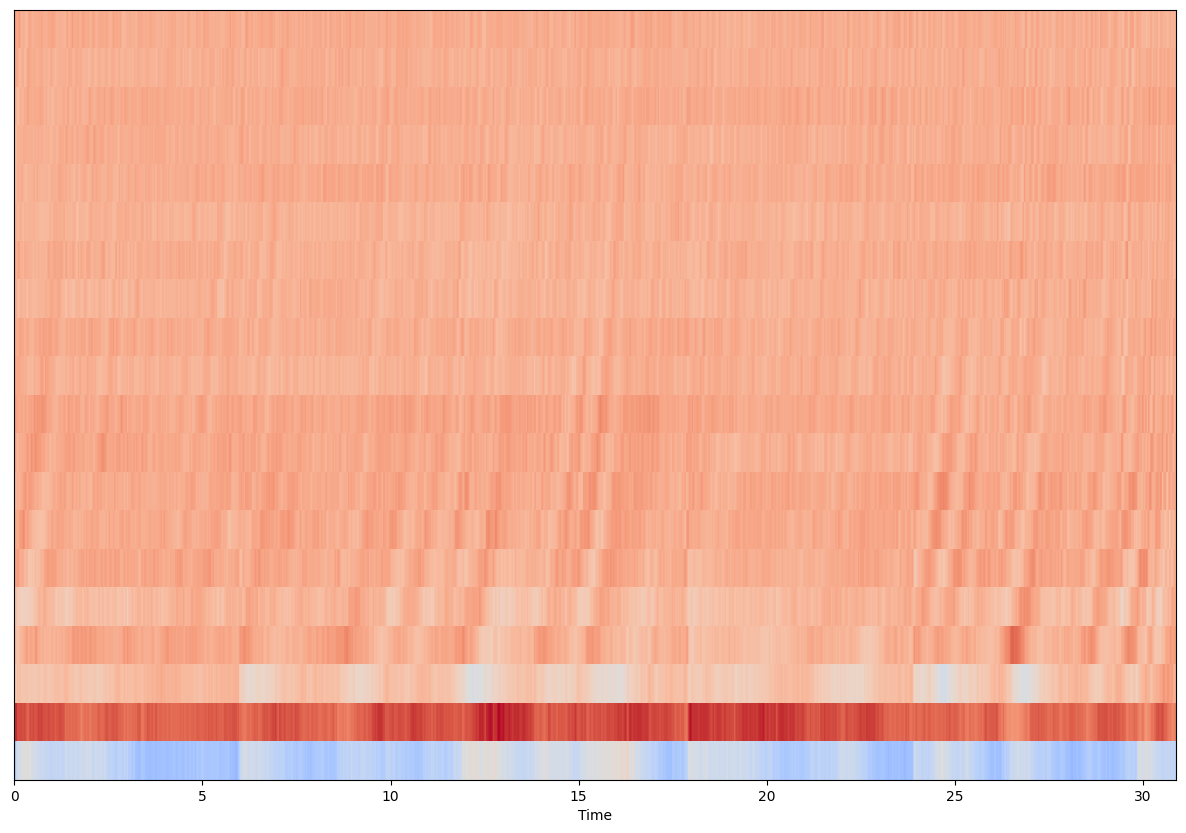

In [24]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')